# Spatial Integral Plots

## Imports, Declarations, and Definitions

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import re, symbols

import spatial_integral as spint

In [2]:
eps = symbols('eps')

In [3]:
def real_finite_part(expr):
    """Return the real finite part of a Laurent series"""
    return re(expr.subs(eps, 0))

## Generate Data

In [4]:
px_grid = np.arange(-5, 6, 1)
deltas = 2, 2, 2

In [5]:
spint_vals_psd = [spint.use_psd([px, 0, 0], [px, 0, 0], deltas) for px in px_grid]
spint_vals_tplquad = [spint.use_tplquad([px, 0, 0], [px, 0, 0], deltas) for px in px_grid]

In [66]:
spint_vals_psd_plotdata = np.array([real_finite_part(val[0]) for val in spint_vals_psd], dtype=float)
spint_errs_psd_plotdata = np.array([real_finite_part(val[1]) for val in spint_vals_psd], dtype=float)

In [67]:
spint_vals_tplquad_plotdata = np.array([val[0].real for val in spint_vals_tplquad], dtype=float)
spint_errs_tplquad_plotdata = np.array([val[1].real for val in spint_vals_tplquad], dtype=float)

# Plot Data

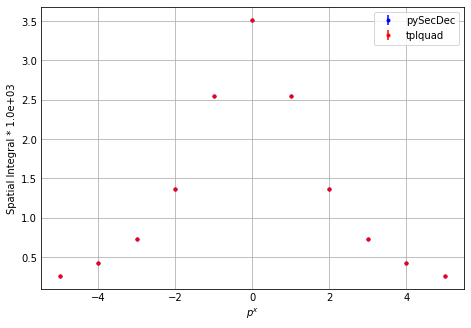

In [78]:
scale = 1e3
fig, ax = plt.subplots()
ax.errorbar(x=px_grid, y=spint_vals_psd_plotdata * scale, yerr=spint_errs_psd_plotdata * scale, 
    fmt='.', label='pySecDec', color='blue')
ax.errorbar(x=px_grid, y=spint_vals_tplquad_plotdata * scale, yerr=spint_errs_tplquad_plotdata * scale, 
    fmt='.', label='tplquad', color='red')
ax.set_xlabel(r'$p^x$')
ax.set_ylabel('Spatial Integral * {:3.1e}'.format(scale))
ax.legend(loc='upper right')
fig.set_size_inches(6, 4)